In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Import the dataset
data = pd.read_csv(r"D:\kaggle\cancer data\data.csv")

data.head(2)



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [4]:
# Check for null values
print("Null values in each column:\n", data.isnull().sum())

# Check data types
print("\nData types of each column:\n", data.dtypes)


Null values in each column:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_di

In [5]:
# Drop the column named 'Unnamed: 32' if it exists
if 'Unnamed: 32' in data.columns:
    data = data.drop(columns=['Unnamed: 32'])


In [6]:
# Perform label encoding for object types
object_cols = data.select_dtypes(include=['object']).columns
if len(object_cols) > 0:
    le = LabelEncoder()
    for col in object_cols:
        data[col] = le.fit_transform(data[col])
    print("\nLabel encoding applied to columns:", object_cols)


Label encoding applied to columns: Index(['diagnosis'], dtype='object')


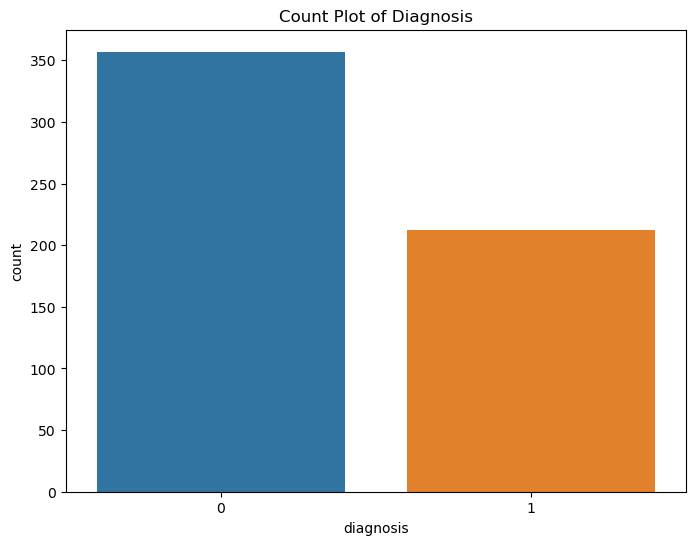

In [7]:
# Create count plot for the 'diagnosis' column
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=data)
plt.title('Count Plot of Diagnosis')
plt.show()

D:\EMPTY\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\EMPTY\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\EMPTY\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\EMPTY\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


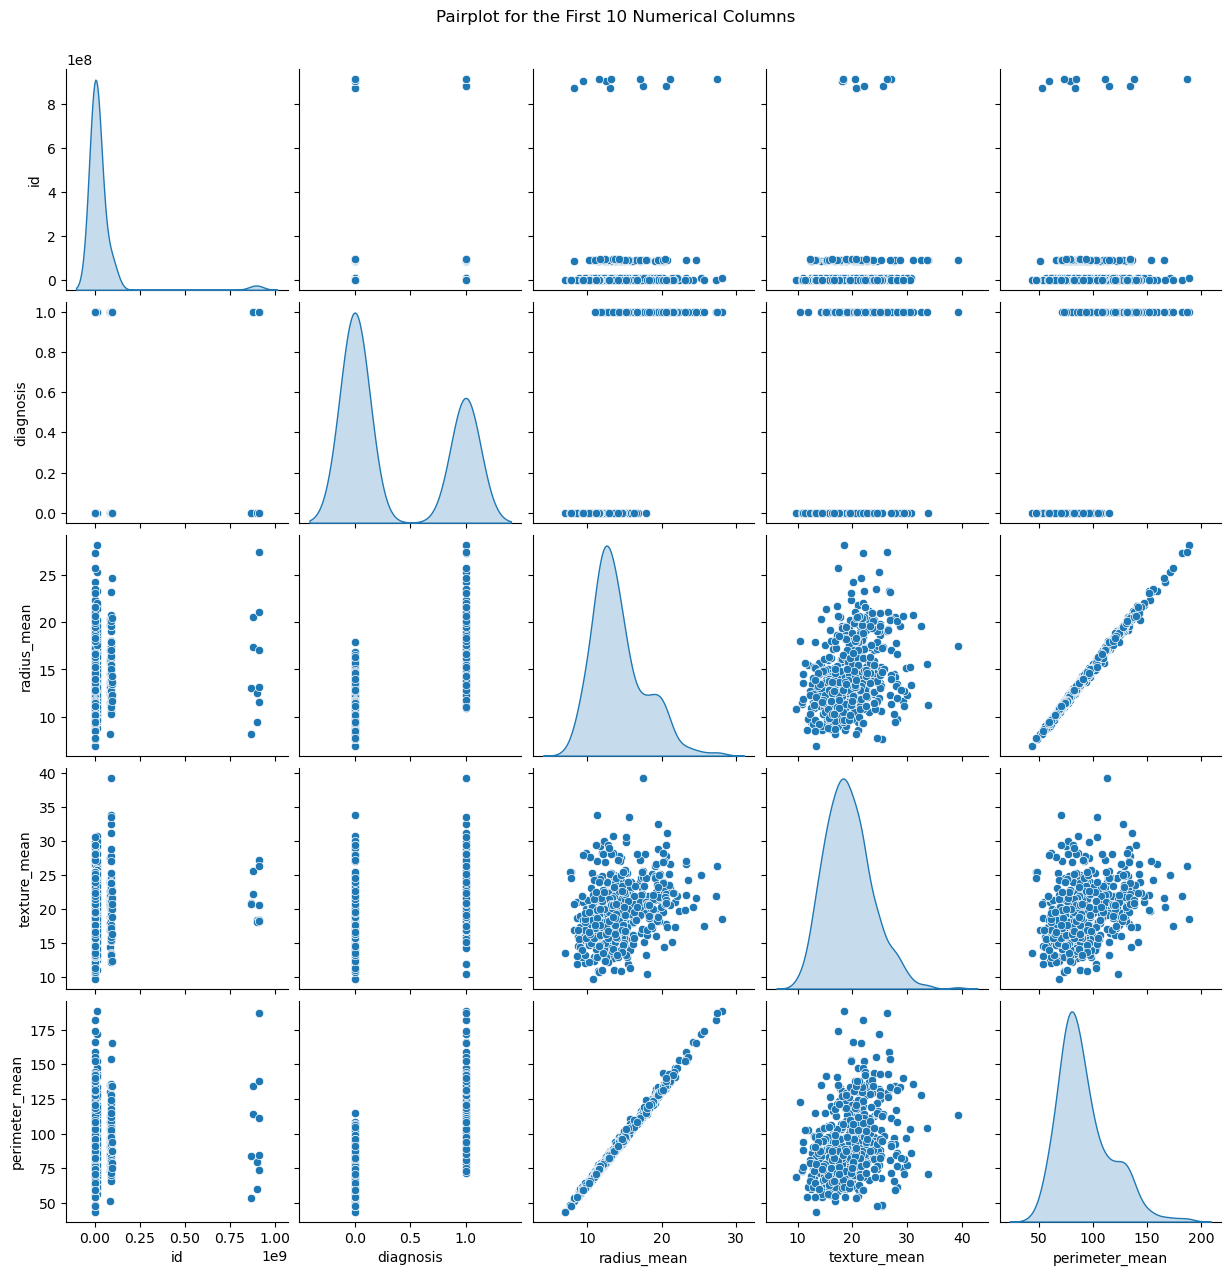

In [8]:
# Create pair plot for the first 10 numerical columns
num_cols = data.select_dtypes(include=[np.number]).columns
if len(num_cols) > 1:
    sns.pairplot(data[num_cols[:5]], diag_kind="kde")
    plt.suptitle('Pairplot for the First 10 Numerical Columns', y=1.02)
    plt.show()
else:
    print("Not enough numerical columns to create a pair plot.")

In [9]:
# Prepare the data for training and testing
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']


In [10]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [13]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)


In [14]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.94

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        71
           1       0.91      0.93      0.92        43

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



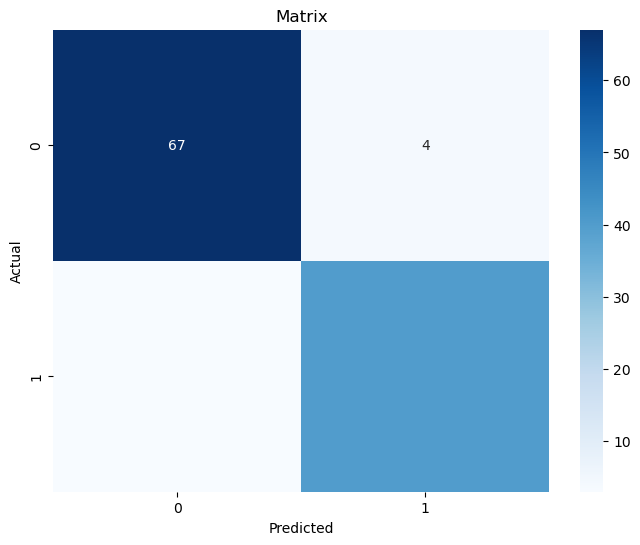

In [15]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [17]:
# Prepare a manual array for prediction (example with random values, adjust as needed)
manual_data = np.array([[15.0]*31])
                         #, 20.0, 0.1, 0.2, 0.2, 1.0, 2.0, 15.0, 25.0, 0.3]])  # Replace with actual feature values
# Class mapping
class_mapping = dict(zip(le.transform(le.classes_), le.classes_))
print("\nClasses \n", class_mapping)
manual_prediction = dt_classifier.predict(manual_data)
print(f'\nManual Prediction: {manual_prediction}')


Classes 
 {0: 'B', 1: 'M'}

Manual Prediction: [0]


D:\EMPTY\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
